# **Internship Task - Genius.AI**


**Submitted by : Kishan Yadav**

In [1]:
# Importing necessary modules for  EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset

df = pd.read_csv('/content/drive/My Drive/taskdata.csv')

In [3]:
# Let check the dataset
df.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [4]:
# Let check the shape
df.shape

(4407, 17)


<ul>
<li>Our dataframe contains <b>4407</b> datapoints <b> 17 features</b> </li>
<li><b>Problem Statement :- </b> Binary classification</li>
<li><b>Target :- </b> We need to predict the customer stay or leave from service, based on given inputs</li>
</ul>

## **Features** :

>>**max_return_days**:- Maximum number of days in which user made a re-purchase

>>**average_return_days**:- Average number of days in which user made a purchase

>>**customer_since_months** :- No of months since user started paying

>>**total_revenue**:- Total revenue made from this user

>> **average_revenue**:- Average revenue made from this user

>>**avg_vas_count**:- Average amount of vas counts

>>**avg_used_vas_value**:- Average number of vas used by the user

>>**business_type**:- Business type

>>**avg_wallet_bonus**:- Average bonus amount in wallet

>>**avg_active_ads**:- Average no of active ads

>>**avg_new_ads**:- Average no of new ads

>>**avg_email_replies**:- Average no of email replies

>>**avg_call_replies**:- Average no of call replies

>>**avg_sms_replies**:- Average no of sms replies

>>**target**:- If user stays or leaves

If you observe the above dataframe we have 17 features, we need to drop some of the features which has no impact or lessar impact.

# **EDA**

>> If we observe the dataframe user_id & account_id not useful for to solve problem statement.

In [11]:
# Droping user_id  & account_id 
# From dataset

df.drop(['user_id','account_id'],axis=1,inplace=True)

In [12]:
# let check it
df.head()

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   max_return_days        4407 non-null   int64  
 1   average_return_days    4407 non-null   float64
 2   customer_since_months  4407 non-null   int64  
 3   total_revenue          4407 non-null   float64
 4   average_revenue        4407 non-null   float64
 5   avg_vas_count          4407 non-null   float64
 6   avg_used_vas_value     4407 non-null   float64
 7   business_type          4407 non-null   int64  
 8   avg_wallet_bonus       4407 non-null   float64
 9   avg_active_ads         4407 non-null   float64
 10  avg_new_ads            4407 non-null   float64
 11  avg_email_replies      4407 non-null   float64
 12  avg_call_replies       4407 non-null   float64
 13  avg_sms_replies        4407 non-null   float64
 14  target                 4407 non-null   int64  
dtypes: f

Here we can notice that now our dataframe has no null value and we have 11 column as float data type and 4 are integer.

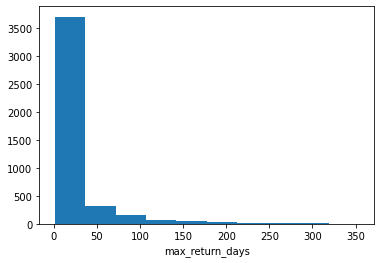

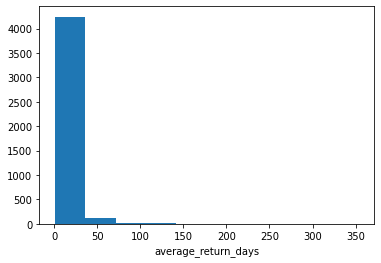

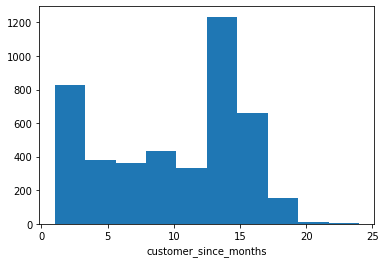

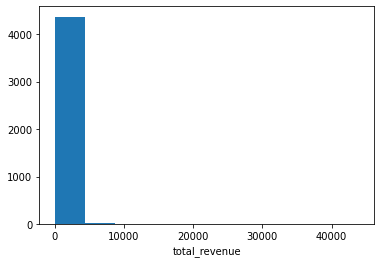

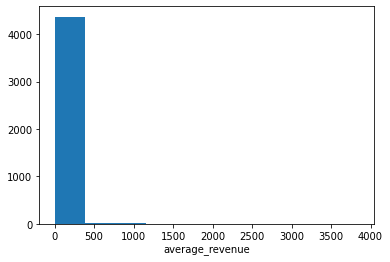

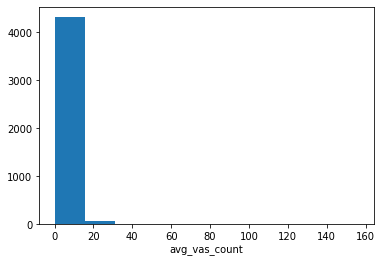

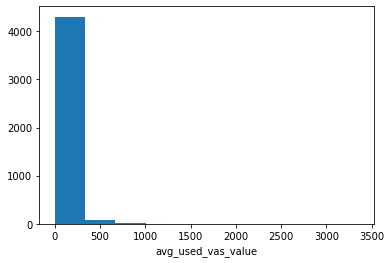

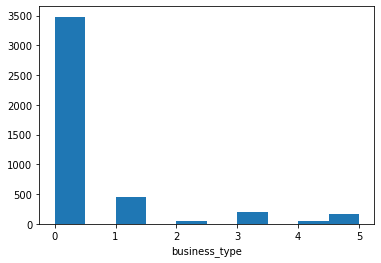

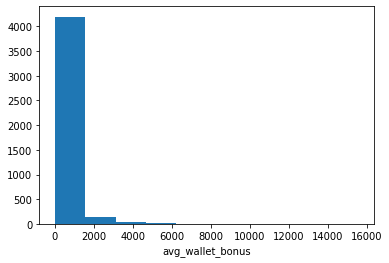

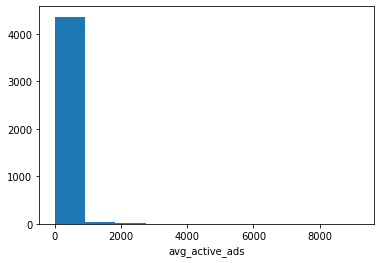

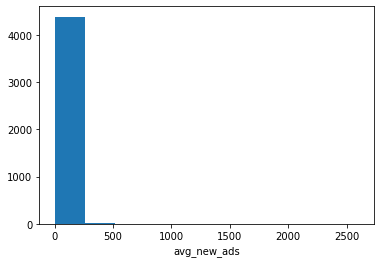

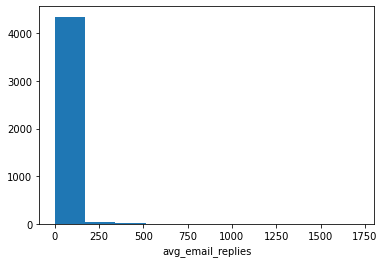

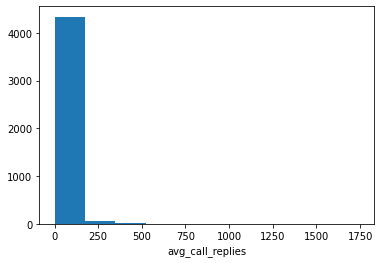

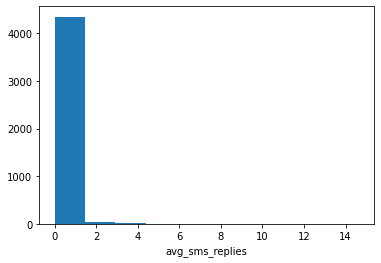

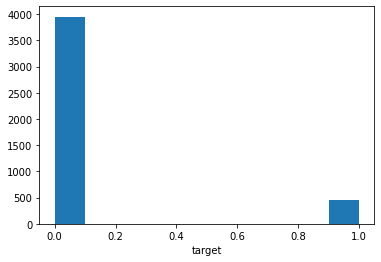

In [15]:
# Plotting histograms of all features
for feature in df.columns:
  plt.hist(df[feature])
  plt.xlabel(feature)
  plt.show()

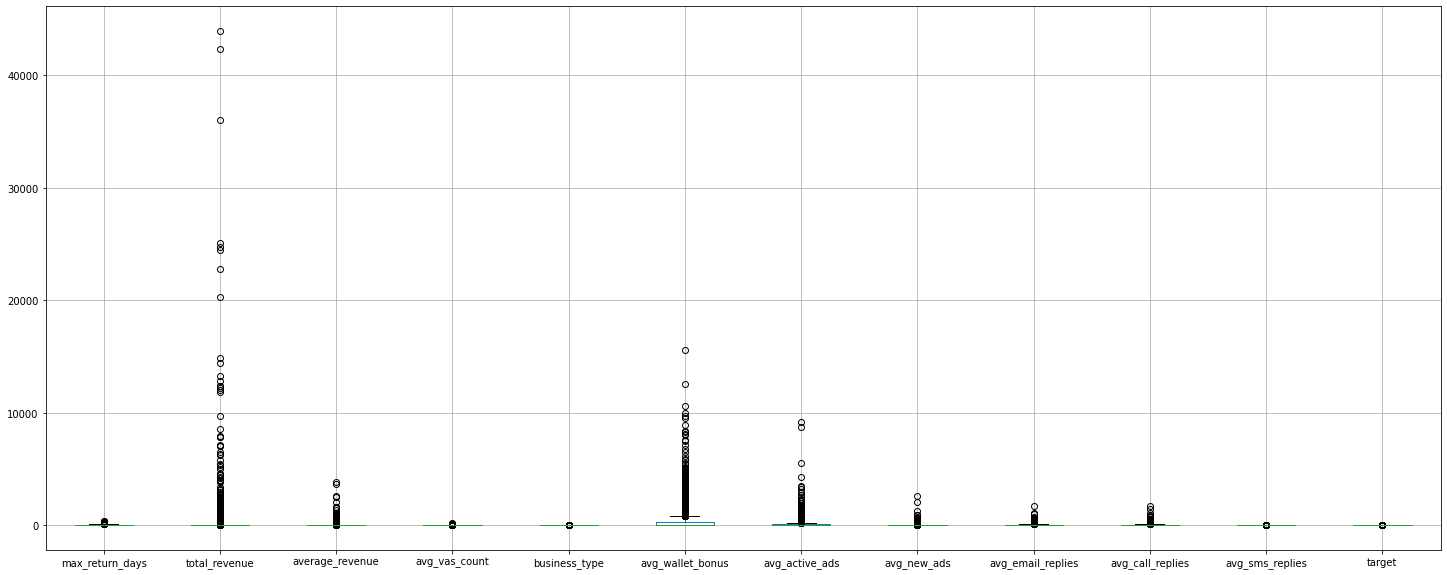

In [20]:
# Exploring outliers using boxplot

df.boxplot(column=['max_return_days',
 'total_revenue',
 'average_revenue',
 'avg_vas_count',
 'business_type',
 'avg_wallet_bonus',
 'avg_active_ads',
 'avg_new_ads',
 'avg_email_replies',
 'avg_call_replies',
 'avg_sms_replies',
 'target'],figsize=(25,10))
plt.show()

If we observe the above boxplots total_revenue and avg_wallet_bonus features contains large amount of outliers.

>we can remove outliers with the help IQR

>Some times outliers also play very import role at that we can't remove outliers 

>So we can use ML algo which are not impact by outliers

In [22]:
# target data
target = df['target']

In [23]:
target

0       0
1       0
2       0
3       1
4       0
       ..
4402    0
4403    0
4404    0
4405    0
4406    0
Name: target, Length: 4407, dtype: int64

In [24]:
# Let check types of bussiness
df['business_type'].value_counts()

0    3482
1     458
3     199
5     165
4      54
2      49
Name: business_type, dtype: int64

In [25]:
pd.crosstab(df['business_type'], df['target'])

target,0,1
business_type,,
0,3118,364
1,434,24
2,20,29
3,183,16
4,49,5
5,148,17


>In bussiness_type == 2 have more number of leaving than any other types.

>If we observe the above plot we have nearly 3500+ data points belong to class 0
and less than 400 data points belong to class 1

>We clearly understand given data set is imbalanced data set we need to balance the data.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'user leaves')

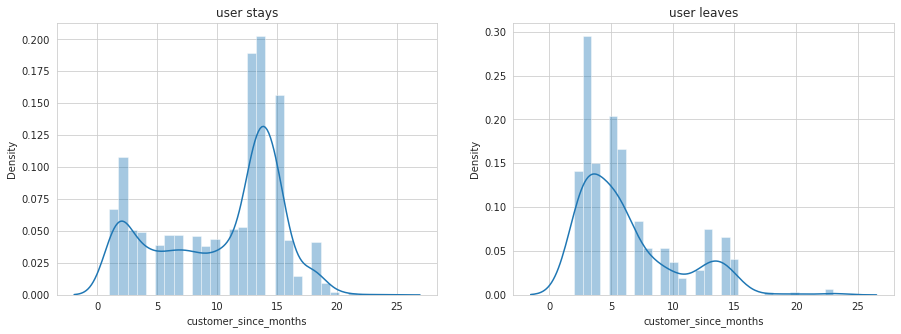

In [28]:
# customer_since_months  Vs  target   (fig_1)

fig,axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df['customer_since_months'][df['target']==0], bins=30, ax=axes[0])
axes[0].set_title('user stays')
sns.distplot(df['customer_since_months'][df['target']==1], bins=30, ax=axes[1])
axes[1].set_title('user leaves')

From above graph we can say that older cutomer have more chance to stay and new cutomer may leave soon in the starting months.


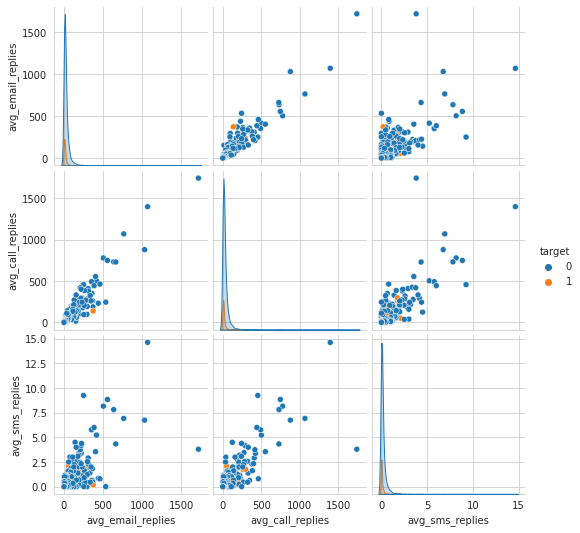

In [31]:
# Let find more intution from data
sns.pairplot(df[['avg_email_replies','avg_call_replies', 'avg_sms_replies','target']], hue='target')

customers having lesser avg_call_replies, avg_sms_replies and avg_email_replies are more likely to leave.

In [32]:
# Let find the Correlation between columns
df.corr()

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
max_return_days,1.000000,0.749094,-0.186734,-0.001811,0.013263,-0.112033,-0.118764,-0.019023,-0.131315,-0.042675,-0.008815,-0.075633,-0.079001,-0.050154,0.275005
average_return_days,0.749094,1.000000,-0.256605,-0.014424,-0.006545,-0.108025,-0.113959,0.026801,-0.103527,-0.046713,-0.016387,-0.070537,-0.070755,-0.038732,0.165715
customer_since_months,-0.186734,-0.256605,1.000000,0.090540,0.063951,0.321568,0.350931,-0.218603,0.352093,0.138861,0.019360,0.206298,0.206565,0.123171,-0.234972
total_revenue,-0.001811,-0.014424,0.090540,1.000000,0.950358,0.608588,0.642122,-0.017495,0.075943,0.341777,0.130780,0.214070,0.214298,0.213396,-0.032571
average_revenue,0.013263,-0.006545,0.063951,0.950358,1.000000,0.586251,0.612556,-0.001665,0.070069,0.354470,0.132430,0.209710,0.209277,0.214935,-0.025354
avg_vas_count,-0.112033,-0.108025,0.321568,0.608588,0.586251,1.000000,0.962312,-0.119815,0.131268,0.413862,0.191781,0.360756,0.342740,0.240634,-0.117167
avg_used_vas_value,-0.118764,-0.113959,0.350931,0.642122,0.612556,0.962312,1.000000,-0.119799,0.156331,0.407619,0.185732,0.363019,0.347185,0.244277,-0.128469
business_type,-0.019023,0.026801,-0.218603,-0.017495,-0.001665,-0.119815,-0.119799,1.000000,-0.107555,-0.076337,-0.005084,-0.050476,-0.054189,0.005367,0.005272
avg_wallet_bonus,-0.131315,-0.103527,0.352093,0.075943,0.070069,0.131268,0.156331,-0.107555,1.000000,0.256563,0.121428,0.273858,0.284432,0.237789,-0.076814
avg_active_ads,-0.042675,-0.046713,0.138861,0.341777,0.354470,0.413862,0.407619,-0.076337,0.256563,1.000000,0.650650,0.704178,0.677154,0.433438,-0.021957


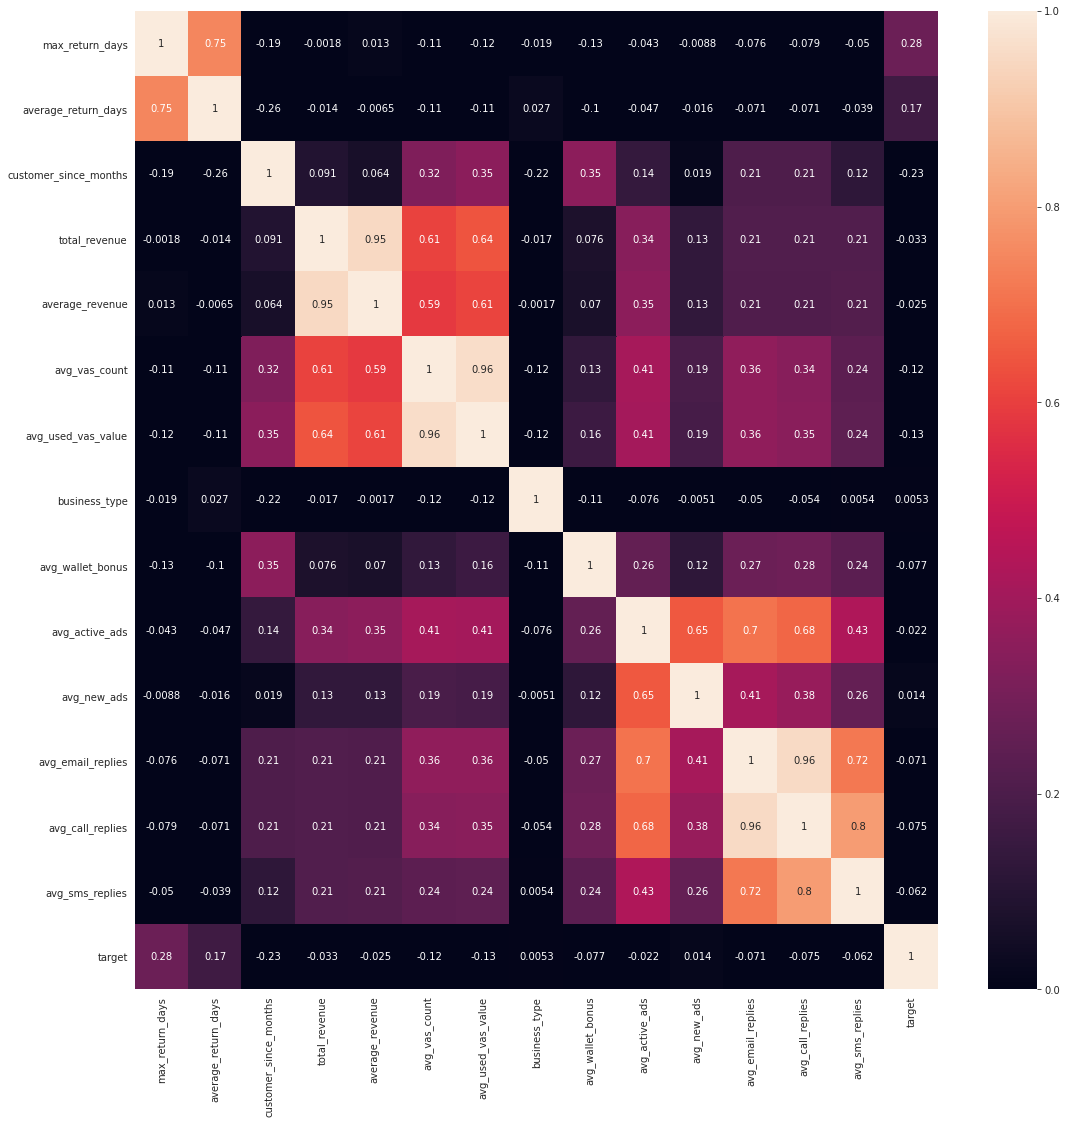

In [33]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, vmin=0 , vmax=1)

**{average_revenue : total_revenue}, 
{avg_used_vas_value : avg_vas_count},
{avg_call_replies : avg_email_replies}**

These are highly correlated features, better to omit one of them for generalised model.

In [34]:
df['target'].value_counts()

0    3952
1     455
Name: target, dtype: int64

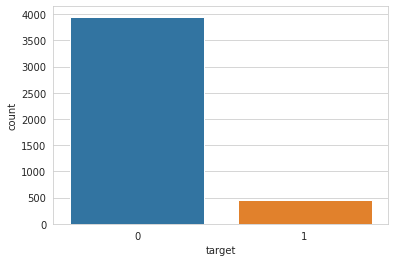

In [26]:
# Exploring imbalance data 
sns.set_style('whitegrid')
sns.countplot(x='target',data=df)

In [35]:
# Dividing the dataframe into independent variables and target variables.
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [36]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4402    0
4403    0
4404    0
4405    0
4406    0
Name: target, Length: 4407, dtype: int64

In [40]:
X.shape, y.shape

((4407, 14), (4407,))

In [39]:
# Handling Imbalanced Dataset
from imblearn.combine import SMOTETomek

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [41]:
# creating object of SMOTETomek
balance= SMOTETomek(random_state=42)
X_bal,y_bal=balance.fit_sample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [42]:
X_bal.shape, y_bal.shape

((7762, 14), (7762,))

Now we can see that the data increases.
SMOTETomek main function is increase the data points in minority class and balance the both classes to remove imbalanceness in data.

In [43]:
# Scaling data to deal with outliers
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X_bal)

In [44]:
transformer

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [45]:
X_scal=transformer.transform(X_bal)

In [46]:
# Creating a dataframe with balanced and scaled dataset 

dataframe=pd.DataFrame(X_scal,columns=['max_return_days', 'average_return_days', 'customer_since_months',
       'total_revenue', 'average_revenue', 'avg_vas_count',
       'avg_used_vas_value', 'business_type', 'avg_wallet_bonus',
       'avg_active_ads', 'avg_new_ads', 'avg_email_replies',
       'avg_call_replies', 'avg_sms_replies'])

In [47]:
dataframe

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies
0,0.090909,-0.017563,0.777778,0.0,0.0,0.770337,0.596166,0.000000,1.473304,0.591421,0.725360,1.371404,1.056560,2.500000
1,0.750000,0.594339,0.333333,0.0,0.0,1.151054,1.243886,0.000000,0.000000,2.521536,0.971837,0.442972,0.294938,0.000000
2,0.113636,-0.014519,0.888889,0.0,0.0,1.284819,1.143535,0.000000,0.736652,0.285037,-0.203977,0.674841,0.872224,0.000000
3,-0.068182,-0.063228,0.777778,0.0,0.0,1.585594,2.094412,0.000000,7.273212,4.763364,6.020095,4.522819,2.658865,0.000000
4,-0.068182,-0.063228,1.222222,0.0,0.0,1.443122,1.178622,0.000000,0.203807,0.198459,-0.370263,0.515197,0.940702,2.307692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7757,-0.068182,-0.063228,-0.555556,0.0,0.0,-0.361525,-0.316114,7.664584,0.000000,-0.410908,-0.507022,-0.484506,-0.449600,0.000000
7758,-0.035017,-0.051267,0.246228,0.0,0.0,-0.176721,-0.098505,0.000000,3.137714,0.119981,0.355427,-0.226994,-0.222103,0.000000
7759,2.402000,2.418355,-0.333333,0.0,0.0,-0.026597,-0.156283,0.000000,0.000000,-0.085459,0.389828,-0.279717,-0.278896,0.000000
7760,0.740910,0.200039,0.638271,0.0,0.0,3.839220,2.037316,0.000000,2.868297,4.910760,4.794988,3.988032,3.618434,0.833333


In [48]:
# Independent features
X=dataframe.copy()

In [49]:
# converting ndarray into pandas Series
y=pd.Series(y_bal)

In [50]:
# Dependent feature
y.value_counts()

1    3881
0    3881
dtype: int64

In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Splitting the independent and dependent features into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [52]:
# Shape of train dataset
X_train.shape,y_train.shape

((5821, 14), (5821,))

In [53]:
# Shape of test dataset
X_test.shape,y_test.shape

((1941, 14), (1941,))

#**Model Creation and Prediction**

In [54]:

from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix

def report(x,y):
    print('roc auc of model is : ', roc_auc_score(x,y))
    print('\n classification report \n: ', classification_report(x,y))
    print('\n confusion matrix : \n ', confusion_matrix(x,y))
    print('\n accuracy  : ', accuracy_score(x,y))

In [57]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Object creation
xgb = XGBClassifier(seed=0)

# parameter
param_grid = {'learning_rate':[0.01,0.1,0.2],'max_depth':[3,5,7],'n_estimators':[100,200,300]}

# Gridsearch
gscv = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy' , verbose=1)
gscv.fit(X_train,y_train)
print(gscv.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  2.8min finished


{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}


In [59]:
# Let train model with best parameters
xgb = XGBClassifier(**gscv.best_params_)
model = xgb.fit(X_train,y_train)
report(model.predict(X_train), y_train)

roc auc of model is :  0.9977722065726369

 classification report 
:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2902
           1       1.00      1.00      1.00      2919

    accuracy                           1.00      5821
   macro avg       1.00      1.00      1.00      5821
weighted avg       1.00      1.00      1.00      5821


 confusion matrix : 
  [[2901    1]
 [  12 2907]]

 accuracy  :  0.9977667067514173


In [62]:
report(model.predict(X_test), y_test)

roc auc of model is :  0.9490410894905277

 classification report 
:                precision    recall  f1-score   support

           0       0.95      0.94      0.95       979
           1       0.94      0.95      0.95       962

    accuracy                           0.95      1941
   macro avg       0.95      0.95      0.95      1941
weighted avg       0.95      0.95      0.95      1941


 confusion matrix : 
  [[924  55]
 [ 44 918]]

 accuracy  :  0.9489953632148377


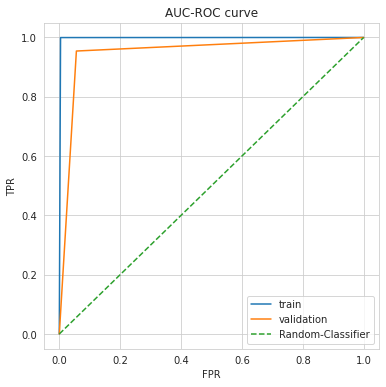

In [63]:
from sklearn.metrics import roc_curve

def plot_train_val(pred,act, x,y):
    fpr, tpr,thres = roc_curve(act , pred)
    fpr1, tpr1,thres1 = roc_curve(x , y)
    
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, label='train')
    plt.plot(fpr1,tpr1, label='validation')
    plt.plot([0,1], [0,1], '--', label='Random-Classifier')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('AUC-ROC curve')
    plt.legend()
    
plot_train_val(model.predict(X_train), y_train, model.predict(X_test), y_test)

# **SHAP** :- SHapley Additive exPlanation

In [79]:
import shap
shap.initjs()

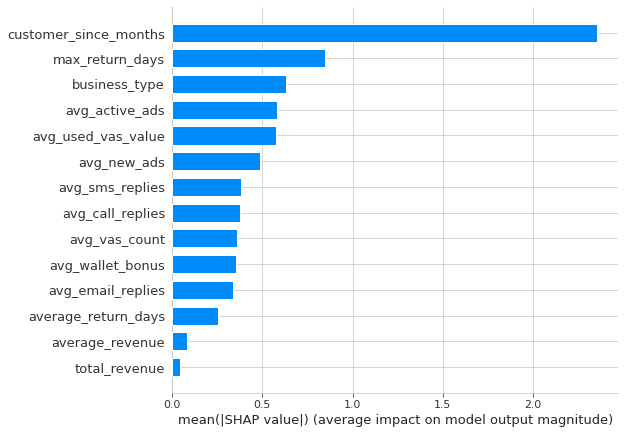

In [80]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

Here we can see that customer_since_months have higher impact, so it is import variable.

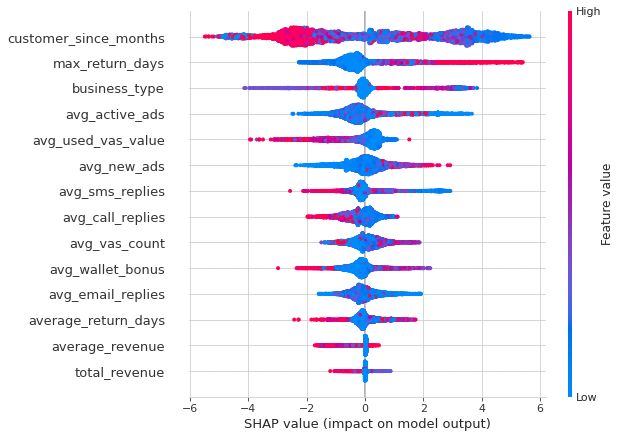

In [81]:
shap.summary_plot(shap_values, X_train)

* **Here we can see 'customer_since_months' is the most important feature, above 
you can see higher the value for customer_since_months the points are on the negative shap value side (i.e., stay)**

* **simillarly, for higher value of 'max_return_days' , SHAP value has positive value. (likely to leave)**

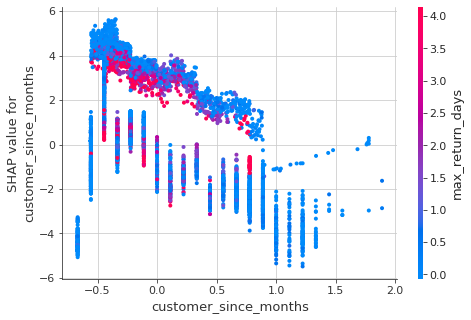

In [72]:
shap.dependence_plot('customer_since_months', shap_values, X_train)

**Here we can see that there is negative trend between the customer_since_month, max_return_days.**

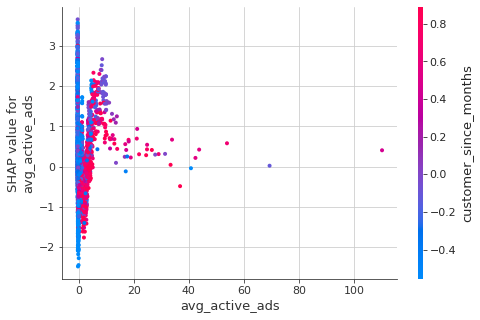

In [73]:
shap.dependence_plot('avg_active_ads', shap_values, X_train)

In [82]:
shap.force_plot(shap.TreeExplainer(model).expected_value, shap_values[0,:], X_test.iloc[0,:])